In [23]:
import numpy as np
import pandas as pd
import random

In [2]:
df_users = pd.read_csv('../data/df_users_train.csv')
df_users.head()

,BGGId,Rating,Username,isTest
0,121657,7.0,crash331,False
1,121657,7.0,randywilburn,False
2,121657,7.0,Lord Kalbut,True
3,121657,7.0,Vegas King,False
4,121657,7.0,Chilwd,False


# 1. Formar grupos

## 1.1 Verificar que todos los usuarios del test tengan al menos 3 juegos con nota mayor a 5

In [3]:
valid_games_count = df_users[(df_users['Rating'] > 5) & df_users.isTest].groupby('Username').size()

valid_users = valid_games_count[valid_games_count >= 3].index.tolist()
valid_users.__len__(), df_users[df_users.isTest].Username.unique().size

(77837, 77867)

In [22]:
df_users.loc[~df_users.Username.isin(valid_users), 'isTest'] = False
valid_users.__len__(), df_users[df_users.isTest].Username.unique().size

(77837, 77837)

## 1.2 Agrupar

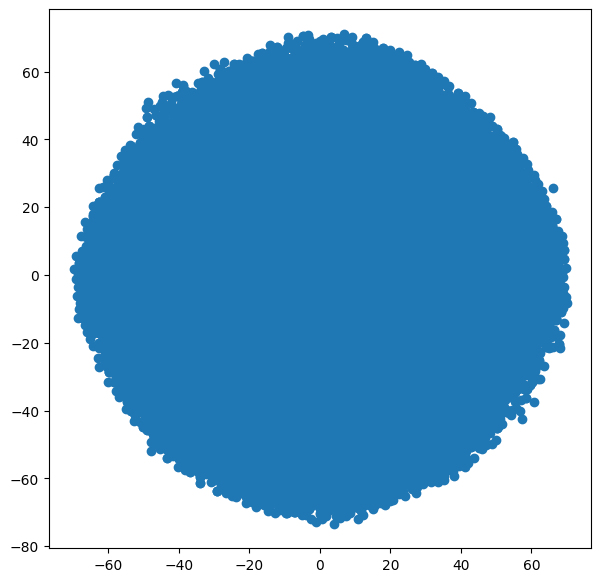

In [17]:
from openTSNE.sklearn import TSNE
import matplotlib.pyplot as plt

df_pivot = df_users[df_users.isTest].pivot_table(index='Username', columns='BGGId', values='Rating', fill_value=0)

tsne = TSNE(n_components=2)
proj = tsne.fit_transform(df_pivot.to_numpy())

plt.figure(figsize=(7, 7))
plt.scatter(proj[:, 0], proj[:, 1])
plt.show()

In [67]:
df_pivot = pd.DataFrame(proj, index=df_pivot.index)
df_pivot.head()

,0,1
Username,,
-=Yod@=-,14.182058,54.212355
-Johnny-,-11.747077,-23.325193
-Morphling-,-12.283854,11.275607
-mIDE-,-10.335632,4.802337
-toni-,52.337393,-15.191353


In [73]:
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

grupos = []
users = list(df_pivot.index)
random.shuffle(users)


with tqdm(total=len(users), desc="Procesando usuarios") as pbar:
    while len(users) > 2:
        sz = min(np.random.randint(2, 9), len(users))

        knn = NearestNeighbors(n_neighbors=min(10, len(users)))
        user_list = list(df_pivot[df_pivot.index.isin(users)].index)
        knn.fit(df_pivot.loc[df_pivot.index.isin(users), :].to_numpy())
        candidates = knn.kneighbors(proj[df_pivot.index==users[0], :], return_distance=False)
        grp = [user_list[x] for x in candidates[:sz].flatten()]
        grupos.append(grp)
        for usr in grp:
            users.remove(usr)
        pbar.update(len(grp))


Procesando usuarios: 100%|██████████| 77837/77837 [03:12<00:00, 405.29it/s] 


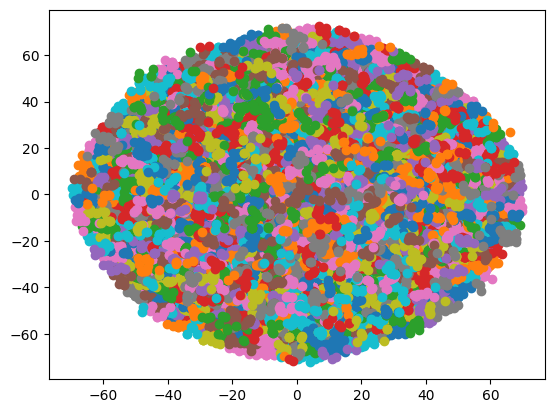

In [77]:
plt.figure()
for gr in grupos:
    aux = proj[df_pivot.index.isin(gr), :]
    plt.scatter(aux[:, 0], aux[:, 1])
plt.show()


In [78]:
df_groups = pd.DataFrame({'members': grupos})
df_groups.head()

,members
0,"[Kirrikk99, threedols, Spiderman_, Sandbagging..."
1,"[Miazgamer, M0KI, granato123, Todo1988, ramiro..."
2,"[geek_1, cbgad, carek, Timulacre, lightbenderf..."
3,"[Trickster61, jhNz, Gustavsjostrom, Boulderdas..."
4,"[ramonk, liher86, pwrhs47, Sjeezel, Taryus, to..."


In [79]:
df_groups.to_csv('../data/df_groups.csv', index=False)

In [80]:
df_groups = pd.read_csv('../data/df_groups.csv')

In [81]:
df_groups

,members
0,"['Kirrikk99', 'threedols', 'Spiderman_', 'Sand..."
1,"['Miazgamer', 'M0KI', 'granato123', 'Todo1988'..."
2,"['geek_1', 'cbgad', 'carek', 'Timulacre', 'lig..."
3,"['Trickster61', 'jhNz', 'Gustavsjostrom', 'Bou..."
4,"['ramonk', 'liher86', 'pwrhs47', 'Sjeezel', 'T..."
...,...
7779,"['sorenbaird', 'radcliff21', 'Kezia', 'dccircu..."
7780,"['brownr', 'rebry', 'iamspamus', 'Hutcharmy', ..."
7781,"['kostas83', 'WenMorJ', 'cruncher_20', 'mikeot..."
7782,"['BlackJackGeary', 'zambochm', 'KRWoods1', 'ti..."
